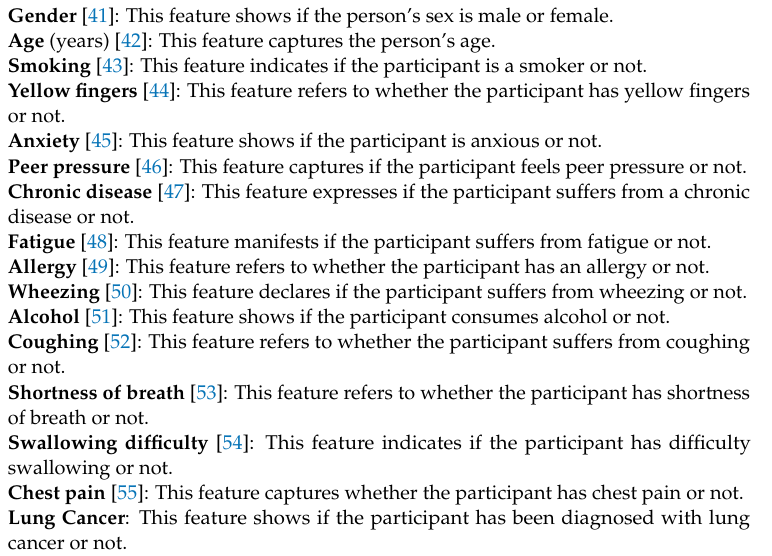

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score


In [ ]:
df=pd.read_csv("/content/survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.shape

(309, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

**All the features are nominal except for age, which is numerical.**

**<h1>As per the Research paper and our analysis, there is no need for pre-processing</h1>**

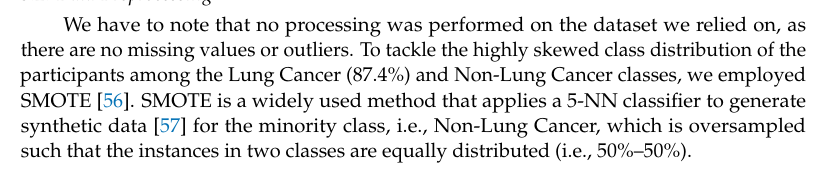

In [ ]:
df['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
YES,238
NO,38


In [ ]:
df['LUNG_CANCER']=df['LUNG_CANCER'].map({'YES':2,'NO':1})
df=pd.get_dummies(df,columns=['GENDER'],drop_first=True)

In [ ]:
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE()
print("Befor:-")
print(y_train.value_counts())
X_train, y_train = sm.fit_resample(X_train, y_train)
print("After:-")
print(y_train.value_counts())


Befor:-
LUNG_CANCER
2    194
1     26
Name: count, dtype: int64
After:-
LUNG_CANCER
2    194
1    194
Name: count, dtype: int64


# **LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Precision:", precision_score(y_train, y_train_pred))
print("Training Recall:", recall_score(y_train, y_train_pred))
print("Training F1 score:", f1_score(y_train, y_train_pred))
print("\n")
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing Precision:", precision_score(y_test, y_test_pred))
print("Testing Recall:", recall_score(y_test, y_test_pred))
print("Testing F1 score:", f1_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Training Accuracy: 0.9355670103092784
Training Precision: 0.9289340101522843
Training Recall: 0.9432989690721649
Training F1 score: 0.9360613810741688


Testing Accuracy: 0.8928571428571429
Testing Precision: 0.6875
Testing Recall: 0.9166666666666666
Testing F1 score: 0.7857142857142857

Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.92      0.79        12
           2       0.97      0.89      0.93        44

    accuracy                           0.89        56
   macro avg       0.83      0.90      0.86        56
weighted avg       0.91      0.89      0.90        56



# **DecisionTreeClassifier**

In [ ]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Precision:", precision_score(y_train, y_train_pred))
print("Training Recall:", recall_score(y_train, y_train_pred))
print("Training F1 score:", f1_score(y_train, y_train_pred))
print("\n")
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing Precision:", precision_score(y_test, y_test_pred))
print("Testing Recall:", recall_score(y_test, y_test_pred))
print("Testing F1 score:", f1_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 score: 1.0


Testing Accuracy: 0.8928571428571429
Testing Precision: 1.0
Testing Recall: 0.5
Testing F1 score: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.50      0.67        12
           2       0.88      1.00      0.94        44

    accuracy                           0.89        56
   macro avg       0.94      0.75      0.80        56
weighted avg       0.91      0.89      0.88        56



**Hyperperameter Tuning**

In [ ]:

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                          cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)


print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Precision:", precision_score(y_train, y_train_pred))
print("Training Recall:", recall_score(y_train, y_train_pred))
print("Training F1 score:", f1_score(y_train, y_train_pred))
print("\n")
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing Precision:", precision_score(y_test, y_test_pred))
print("Testing Recall:", recall_score(y_test, y_test_pred))
print("Testing F1 score:", f1_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: 0.9200799200799199
Training Accuracy: 0.9510309278350515
Training Precision: 0.9310344827586207
Training Recall: 0.9742268041237113
Training F1 score: 0.9521410579345088


Testing Accuracy: 0.9285714285714286
Testing Precision: 0.9
Testing Recall: 0.75
Testing F1 score: 0.8181818181818182

Classification Report:
               precision    recall  f1-score   support

           1       0.90      0.75      0.82        12
           2       0.93      0.98      0.96        44

    accuracy                           0.93        56
   macro avg       0.92      0.86      0.89        56
weighted avg       0.93      0.93      0.93        56



# **RandomForestClassifier**

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Precision:", precision_score(y_train, y_train_pred))
print("Training Recall:", recall_score(y_train, y_train_pred))
print("Training F1 score:", f1_score(y_train, y_train_pred))
print("\n")
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing Precision:", precision_score(y_test, y_test_pred))
print("Testing Recall:", recall_score(y_test, y_test_pred))
print("Testing F1 score:", f1_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 score: 1.0


Testing Accuracy: 0.9285714285714286
Testing Precision: 1.0
Testing Recall: 0.6666666666666666
Testing F1 score: 0.8

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.67      0.80        12
           2       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56



In [ ]:

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

model_rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf,
                              cv=5, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

best_model_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
best_model_rf.fit(X_train, y_train)

y_train_pred_rf = best_model_rf.predict(X_train)
y_test_pred_rf = best_model_rf.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Training Precision:", precision_score(y_train, y_train_pred_rf))
print("Training Recall:", recall_score(y_train, y_train_pred_rf))
print("Training F1 score:", f1_score(y_train, y_train_pred_rf))
print("\n")
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Testing Precision:", precision_score(y_test, y_test_pred_rf))
print("Testing Recall:", recall_score(y_test, y_test_pred_rf))
print("Testing F1 score:", f1_score(y_test, y_test_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rf))


Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score for Random Forest: 0.9510822510822511
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 score: 1.0


Testing Accuracy: 0.9107142857142857
Testing Precision: 1.0
Testing Recall: 0.5833333333333334
Testing F1 score: 0.7368421052631579

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.58      0.74        12
           2       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro avg       0.95      0.79      0.84        56
weighted avg       0.92      0.91      0.90        56



# **AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Precision:", precision_score(y_train, y_train_pred))
print("Training Recall:", recall_score(y_train, y_train_pred))
print("Training F1 score:", f1_score(y_train, y_train_pred))
print("\n")
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing Precision:", precision_score(y_test, y_test_pred))
print("Testing Recall:", recall_score(y_test, y_test_pred))
print("Testing F1 score:", f1_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 0.9536082474226805
Training Precision: 0.9631578947368421
Training Recall: 0.9432989690721649
Training F1 score: 0.953125


Testing Accuracy: 0.9107142857142857
Testing Precision: 0.8888888888888888
Testing Recall: 0.6666666666666666
Testing F1 score: 0.7619047619047619

Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.67      0.76        12
           2       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56



In [ ]:


param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.0001,0.001,0.01, 0.1, 1,2],

}

model_ab = AdaBoostClassifier(random_state=42)

grid_search_ab = GridSearchCV(estimator=model_ab, param_grid=param_grid_ab,
                              cv=5, scoring='accuracy', n_jobs=-1)

grid_search_ab.fit(X_train, y_train)

print("Best parameters for AdaBoost:", grid_search_ab.best_params_)
print("Best score for AdaBoost:", grid_search_ab.best_score_)

best_model_ab = AdaBoostClassifier(**grid_search_ab.best_params_, random_state=42)
best_model_ab.fit(X_train, y_train)

y_train_pred_ab = best_model_ab.predict(X_train)
y_test_pred_ab = best_model_ab.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred_ab))
print("Training Precision:", precision_score(y_train, y_train_pred_ab))
print("Training Recall:", recall_score(y_train, y_train_pred_ab))
print("Training F1 score:", f1_score(y_train, y_train_pred_ab))
print("\n")
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_ab))
print("Testing Precision:", precision_score(y_test, y_test_pred_ab))
print("Testing Recall:", recall_score(y_test, y_test_pred_ab))
print("Testing F1 score:", f1_score(y_test, y_test_pred_ab))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_ab))


Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 100}
Best score for AdaBoost: 0.9357642357642358
Training Accuracy: 0.9587628865979382
Training Precision: 0.9635416666666666
Training Recall: 0.9536082474226805
Training F1 score: 0.9585492227979274


Testing Accuracy: 0.9285714285714286
Testing Precision: 1.0
Testing Recall: 0.6666666666666666
Testing F1 score: 0.8

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.67      0.80        12
           2       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56

